Paramètres : Coef = [0.25713786] , Intercept = 9.037475668452768
MSE : 1.436027972021018
Cross_val = 0.7024780078821247
Prediction de 22,8 = [14.90021876]


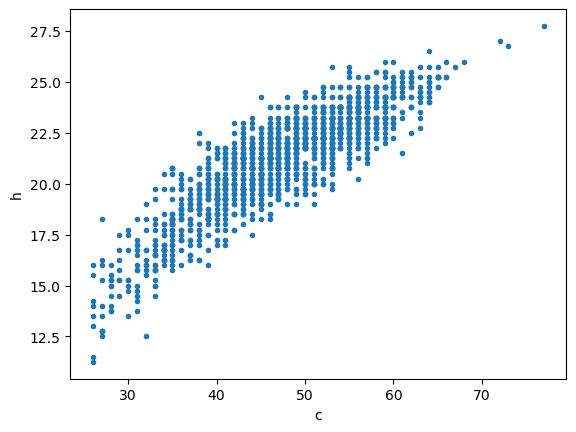

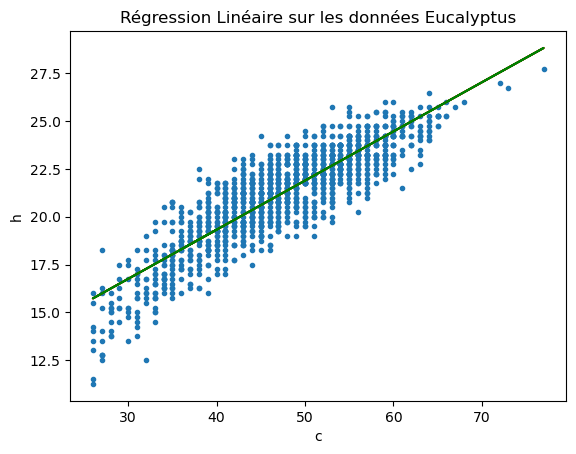

(1429, 2)
Paramètres avec sqrt(c) : Coef = [-0.48294547  9.98688814] , Intercept = -24.35200327424318
MSE  avec sqrt(c): 1.2880728696441848
Cross_val avec sqrt(c): 0.7328870072880683


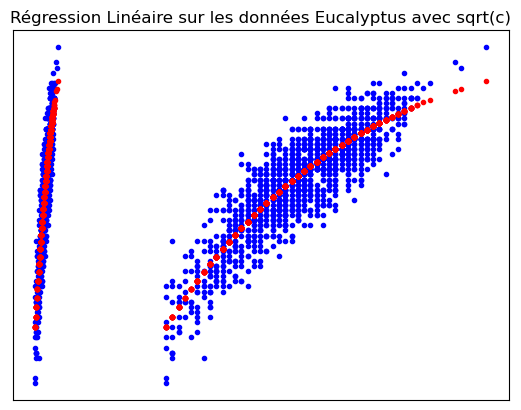

(1429, 3)
Paramètres avec c^2: Coef = [-2.77594347e+00  3.02868608e+01  8.46121691e-03] , Intercept = -74.45820187627984
MSE avec c^2: 1.2762153702584975
Cross_val avec c^2: 0.7351224466101725
Meilleur score by cross_val = 0.7351224466101725 de la régression num : 3


In [10]:
from http.cookiejar import LoadError
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D

def loadData(path):
    data = np.loadtxt(path)
    return data[:,0], data[:,1].reshape(-1,1)

myScores = []

#Question 1,2 et 3 :
h,c = loadData('eucalyptus.txt')
reg = LinearRegression().fit(c, h)
print("Paramètres : Coef =",reg.coef_,", Intercept =", reg.intercept_)
print("MSE :",mean_squared_error(h, reg.predict(c)))
scores = cross_val_score(reg, c, h, cv=10)    
print("Cross_val =",scores.mean())
myScores.append(scores.mean())

print("Prediction de 22,8 =",reg.predict(np.array(22.8).reshape(-1,1)))
plt.scatter(c, h, marker='.')
plt.xlabel('c')
plt.ylabel('h')
plt.show()

plt.scatter(c, h, marker='.')
plt.plot(c, reg.predict(c), color='red')
plt.plot(c,(reg.coef_*c)+reg.intercept_, color='green')
plt.xlabel('c')
plt.ylabel('h')
plt.title('Régression Linéaire sur les données Eucalyptus')
plt.show()

#Question 4 :

h , c1 = loadData('eucalyptus.txt')
c2 = np.sqrt(c1)
c = np.concatenate((c1,c2),axis=1)
print(c.shape)

linear = LinearRegression().fit(c, h)
print("Paramètres avec sqrt(c) : Coef =",linear.coef_,", Intercept =", linear.intercept_)
print("MSE  avec sqrt(c):",mean_squared_error(h, linear.predict(c)))
scores = cross_val_score(linear, c, h, cv=10)    
print("Cross_val avec sqrt(c):",scores.mean())
myScores.append(scores.mean())



plt.plot(c, h, color="blue", linewidth=0, marker=".")
plt.plot(c, linear.predict(c), ".", color="red", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Régression Linéaire sur les données Eucalyptus avec sqrt(c)')
plt.show()

#Question 5 :

h , c1 = loadData('eucalyptus.txt')
c2 = np.sqrt(c1)
c3 = c1**2
C = np.concatenate((c1,c2,c3),axis=1)
print(C.shape)

lin_reg = LinearRegression().fit(C, h)
print("Paramètres avec c^2: Coef =",lin_reg.coef_,", Intercept =", lin_reg.intercept_)
print("MSE avec c^2:",mean_squared_error(h, lin_reg.predict(C)))
scores = cross_val_score(lin_reg, C, h, cv=10)    
print("Cross_val avec c^2:",scores.mean())
myScores.append(scores.mean())

#Question 6 :
# Régression 1 avec seulement c, Régression 2 avec sqrt(c), Régression 3 avec sqrt(c) et c^2.
print("Meilleur score by cross_val =",np.max(myScores),"de la régression num :",np.argmax(myScores)+1)

Score : 0.8782258064516129
Paramètres : Coef : [-42.58064516] , Intercept : 644.5161290322579
MSE : 121.7741935483871


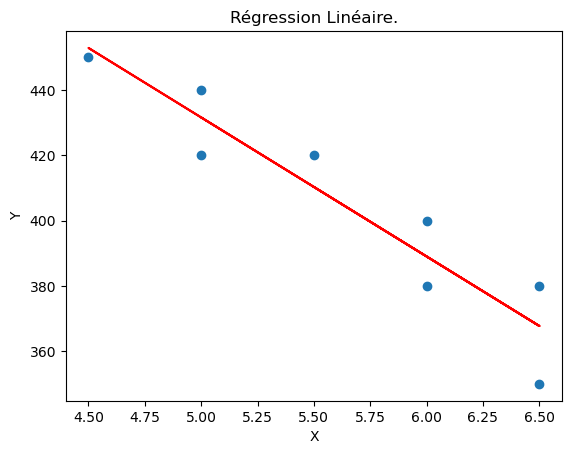

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Question 1,2,3,4 et 5 : 
X = np.array([5.5, 6.0, 6.5, 6.0, 5.0, 6.5, 4.5, 5])
X = X.reshape(-1, 1)
y = np.array([420, 380, 350, 400, 440, 380, 450, 420])

reg = LinearRegression().fit(X, y)
y_pred=reg.predict(X)

print("Score :", reg.score(X, y))
print("Paramètres : Coef :", reg.coef_, ", Intercept :", reg.intercept_)
print("MSE :",mean_squared_error(y, y_pred))

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
#plt.plot(X,(reg.coef_*X)+reg.intercept_, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Régression Linéaire.')
plt.show()
